In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio","Liver Disease"])

In [3]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Liver Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.dropna(inplace=True)

In [5]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == 'Male' else 0)

In [6]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Liver Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
X = df.drop("Liver Disease", axis=1)
y = df["Liver Disease"]
trX, tesX, trY, tesY = train_test_split(X, y, test_size=0.2, random_state=55)

In [8]:
scaler = StandardScaler()  #PreProcessing for Dat a Consistency and better MODEL
trX = scaler.fit_transform(trX)
tesX = scaler.transform(tesX)

In [9]:
trX, tesX, trY, tesY = train_test_split(X, y, test_size=0.2, random_state=55)

In [10]:
model = LogisticRegression(max_iter= 1000)

In [11]:
model.fit(trX, trY)
p1 = model.predict(tesX)

In [12]:
acc = accuracy_score(tesY, p1)

In [13]:
cm = confusion_matrix(tesY, p1)

In [14]:
corm = df.corr()

In [15]:
rep = classification_report(tesY, p1)

In [16]:
df.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Liver Disease
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [17]:
f"Accuracy : {acc*100}%"

'Accuracy : 70.6896551724138%'

In [18]:
print(f"Co-Relation Matrix : \n{corm}")

Co-Relation Matrix : 
                    Age    Gender        TB        DB   Alkphos      Sgpt  \
Age            1.000000  0.055881  0.011000  0.006784  0.078878 -0.087799   
Gender         0.055881  1.000000  0.088068  0.099160 -0.029368  0.081339   
TB             0.011000  0.088068  1.000000  0.874481  0.205739  0.213375   
DB             0.006784  0.099160  0.874481  1.000000  0.234008  0.233180   
Alkphos        0.078878 -0.029368  0.205739  0.234008  1.000000  0.124777   
Sgpt          -0.087799  0.081339  0.213375  0.233180  0.124777  1.000000   
Sgot          -0.020499  0.079421  0.237323  0.257022  0.166580  0.791862   
TP            -0.186248 -0.095149 -0.007906  0.000033 -0.027062 -0.042432   
ALB           -0.264211 -0.095579 -0.222087 -0.228409 -0.163419 -0.028658   
A/G Ratio     -0.216408 -0.003424 -0.206267 -0.200125 -0.234166 -0.002375   
Liver Disease -0.133164 -0.081349 -0.220218 -0.246273 -0.183363 -0.163117   

                   Sgot        TP       ALB  A/G Rati

In [19]:
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[73  8]
 [26  9]]


In [20]:
print(f"Report : \n{rep}")

Report : 
              precision    recall  f1-score   support

           1       0.74      0.90      0.81        81
           2       0.53      0.26      0.35        35

    accuracy                           0.71       116
   macro avg       0.63      0.58      0.58       116
weighted avg       0.67      0.71      0.67       116



In [21]:
print("\nEnter details for prediction:")
age = int(input("Age: "))
gender = int(input("Gender (0 for Female, 1 for Male): "))
total_bilirubin = float(input("Total Bilirubin: "))
direct_bilirubin = float(input("Direct Bilirubin: "))
alkaline_phosphotase = float(input("Alkaline Phosphotase: "))
alamine_aminotransferase = float(input("Alamine Aminotransferase: "))
aspartate_aminotransferase = float(input("Aspartate Aminotransferase: "))
total_proteins = float(input("Total Proteins: "))
albumin = float(input("Albumin: "))
albumin_globulin_ratio = float(input("Albumin and Globulin Ratio: "))


Enter details for prediction:


In [22]:
test = [[age, gender, total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase, total_proteins, albumin, albumin_globulin_ratio]]
test1 = scaler.transform(test)

/home/el_professor258/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
test_predict = model.predict(test1)

/home/el_professor258/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
if test_predict[0] == 2 :
    print("This Patient has the Disease")
else :
    print("Patient is Fit")

This Patient has the Disease


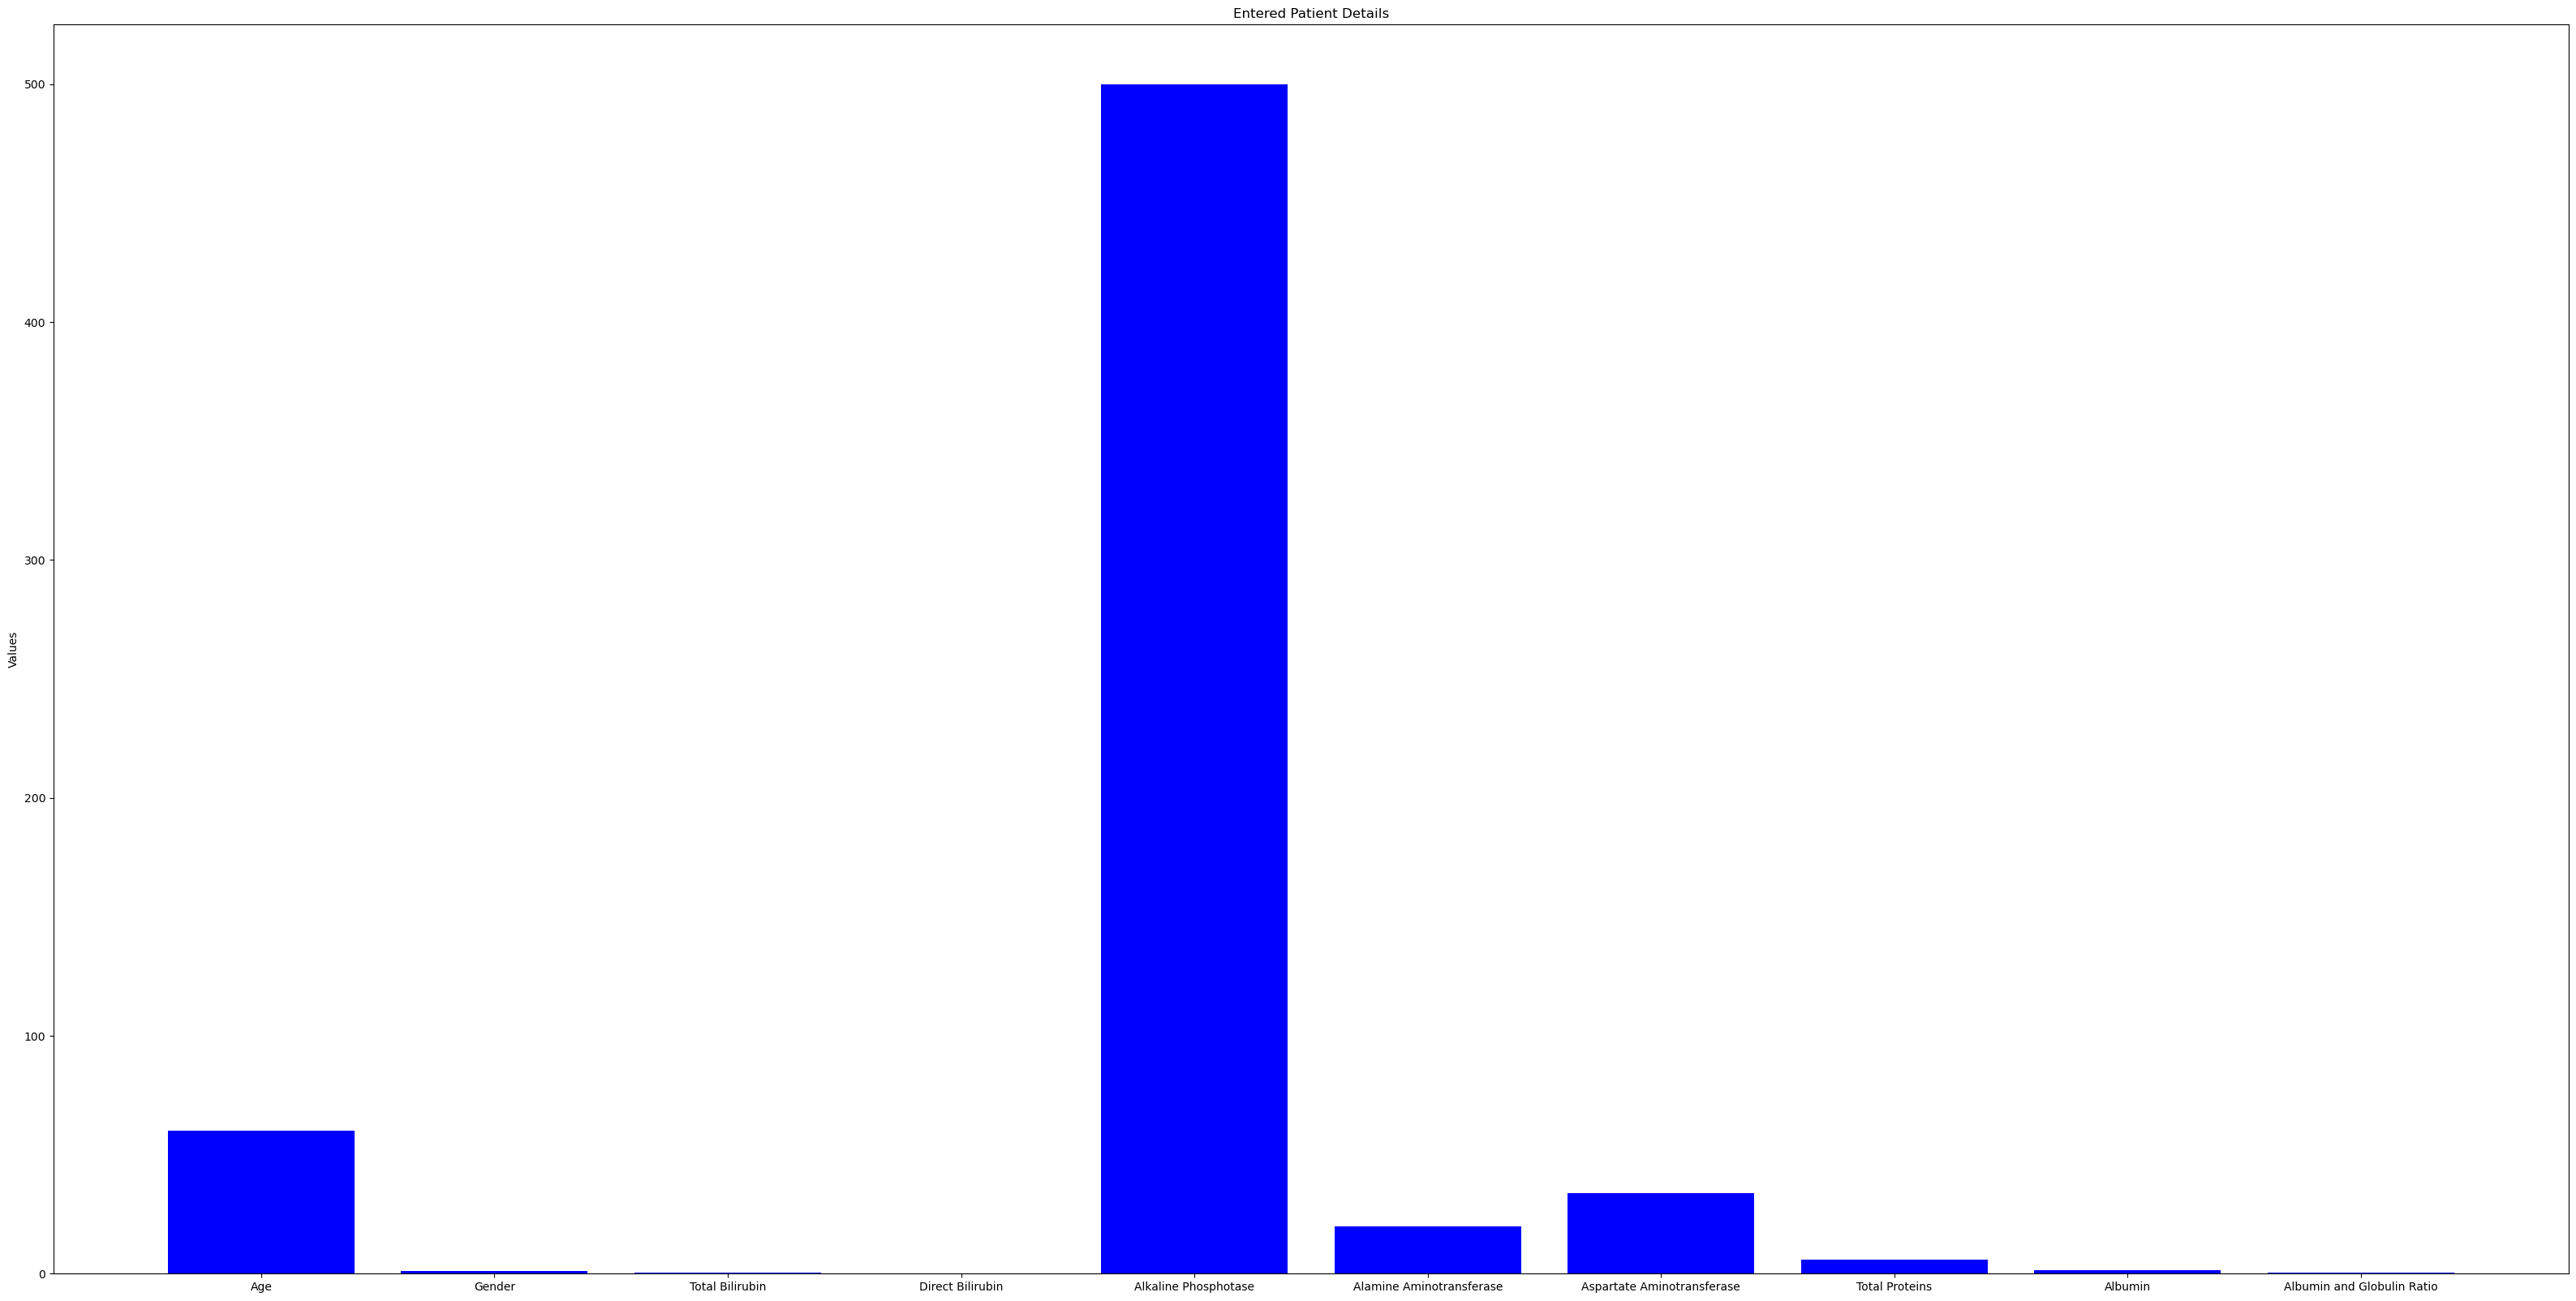

In [25]:
fig, ax = plt.subplots(figsize = (40,20))
user_data_labels = ['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkaline Phosphotase', 'Alamine Aminotransferase', 'Aspartate Aminotransferase', 'Total Proteins', 'Albumin', 'Albumin and Globulin Ratio']
user_data_values = [age, gender, total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase, total_proteins, albumin, albumin_globulin_ratio]
ax.bar(user_data_labels, user_data_values, color='blue')
ax.set_ylabel('Values')
ax.set_title('Entered Patient Details')
plt.show()